In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 19 - practice\auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.914573,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.368723,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.761353,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.827564,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.882510,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.761353,0.827564,0.882510,1.000000,0.850347,-0.673860,-0.403572,-0.455139
weight,-0.831741,0.896017,0.932824,0.850347,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.673860,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.403572,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455139,-0.581024,0.205873,0.180662,1.000000


In [6]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
data = data[['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']]
data

,cylinders,displacement,horsepower,weight,mpg
0,8,307.0,130,3504,18.0
1,8,350.0,165,3693,15.0
2,8,318.0,150,3436,18.0
3,8,304.0,150,3433,16.0
4,8,302.0,140,3449,17.0
...,...,...,...,...,...
393,4,140.0,86,2790,27.0
394,4,97.0,52,2130,44.0
395,4,135.0,84,2295,32.0
396,4,120.0,79,2625,28.0


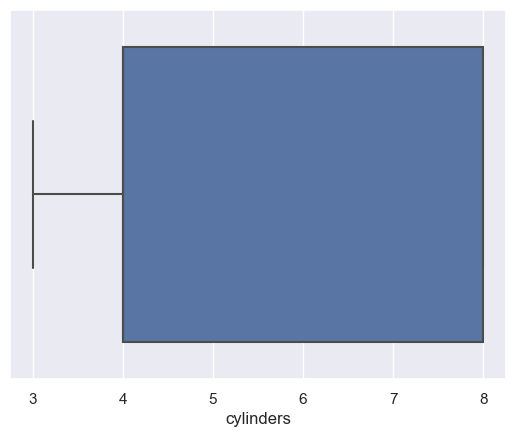

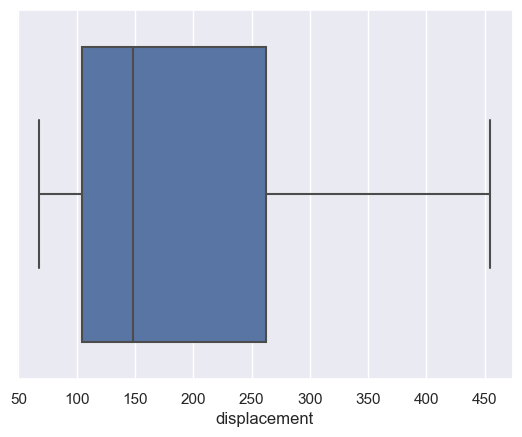

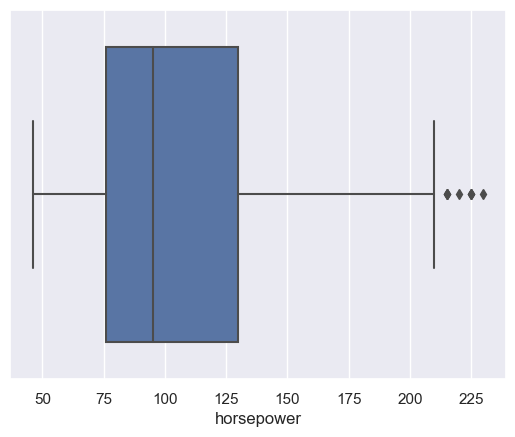

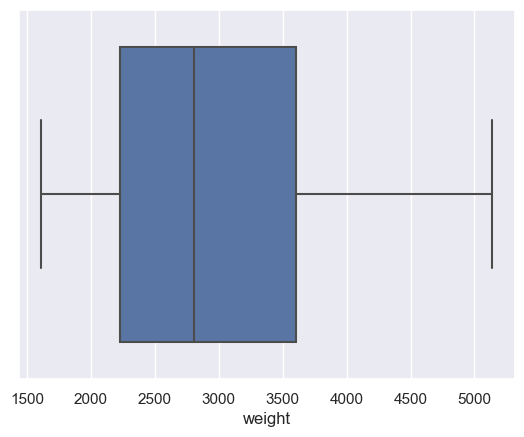

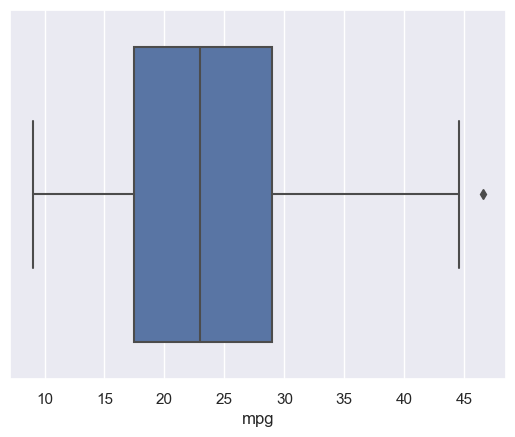

In [8]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [9]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


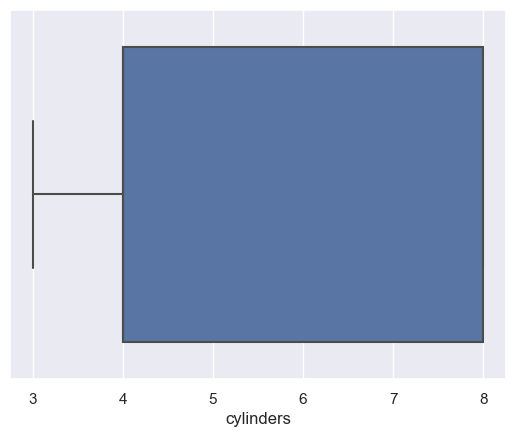

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


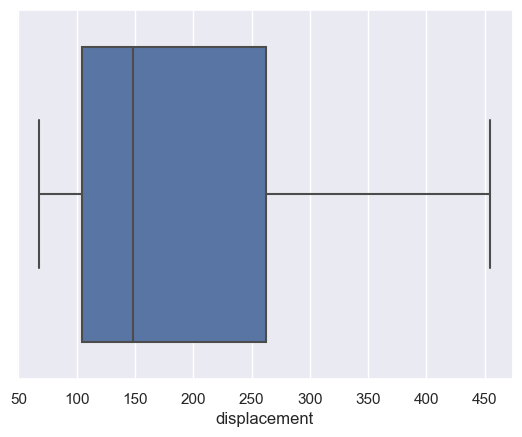

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


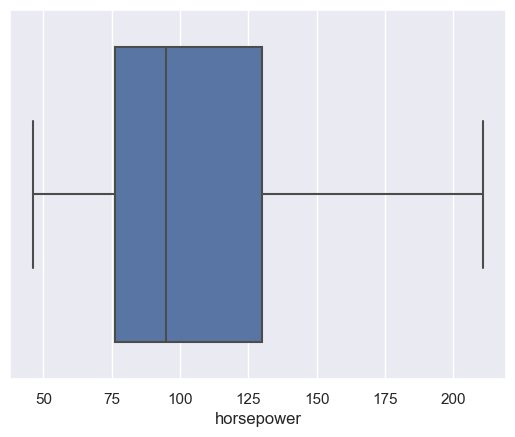

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


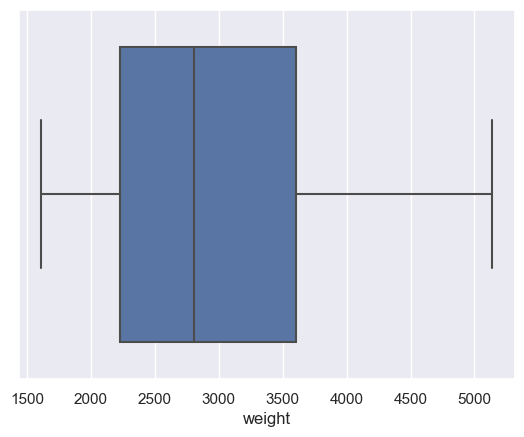

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\4003430389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


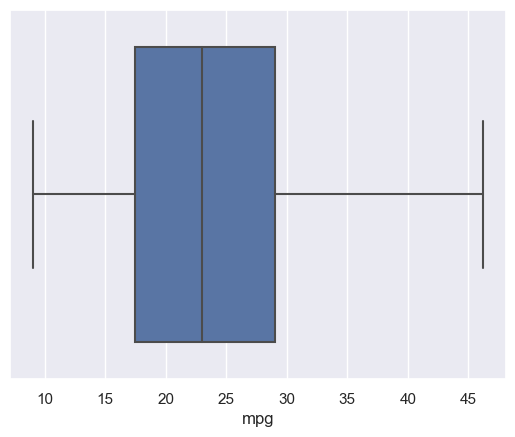

In [10]:
for i in data.columns:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['cylinders', 'displacement', 'horsepower', 'weight']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,73.612913,cylinders
1,22.319235,displacement
2,38.691216,horsepower
3,70.876933,weight


In [12]:
data.head()

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0


In [13]:
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'mpg'], dtype='object')

In [14]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight']]
y = data[['mpg']]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [17]:
reg = DecisionTreeRegressor()

In [18]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
y_pred = reg.predict(X_test)

In [20]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.634583333333333
MSE is 26.250020833333338
RMSE is 5.123477416104548
R2 score is 0.5426137478775721


In [21]:
regRF = RandomForestRegressor(n_estimators = 10)

In [22]:
regRF.fit(X_train,y_train)

C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\1717636768.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regRF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10)

In [23]:
y_predRF = regRF.predict(X_test)

In [24]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predRF)
mse = metrics.mean_squared_error(y_test, y_predRF)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predRF)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 2.724791666666667
MSE is 14.30455604166667
RMSE is 3.7821364387957597
R2 score is 0.7507542063408591


In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)    

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [26]:

# the verbose parameter above will give output updates as the calculations are complete.
# n_jobs = -1 means using all processors

rf_random = RandomizedSearchCV(estimator = regRF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [27]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [28]:
optimizedmodel = RandomForestRegressor(n_estimators = 1200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 20)

In [32]:
optimizedmodel.fit(X_train, y_train)


C:\Users\nijat\AppData\Local\Temp\ipykernel_5324\2215982710.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  optimizedmodel.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1200)

In [35]:
y_pred = optimizedmodel.predict(X_test)

In [36]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 2.495565724206341
MSE is 11.395666708660118
RMSE is 3.375746837169535
R2 score is 0.8014393466807582


In [38]:
data

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [59]:
X_test

array([[-0.85632057, -0.98355191, -1.37123912, -1.38975675],
       [-0.85632057, -0.70507731, -0.68175504, -0.40841088],
       [ 0.32093534,  0.37041078, -0.12486405, -0.39776978],
       [ 1.49819126,  1.19623199,  1.20106688,  1.14637205],
       [ 1.49819126,  1.19623199,  1.20106688,  1.49752834],
       [-0.85632057, -0.92593647, -0.44308747, -1.0291417 ],
       [-0.85632057, -0.51302587, -0.337013  , -0.12464822],
       [ 1.49819126,  2.36774581,  2.81870261,  2.08633587],
       [ 1.49819126,  0.6392828 ,  0.14032214,  1.28825338],
       [ 0.32093534,  0.06312847,  0.77676898, -0.11282477],
       [ 1.49819126,  1.88761719,  2.26181162,  1.03996105],
       [-0.85632057, -0.98355191, -0.99997846, -1.1887582 ],
       [-0.85632057, -0.98355191, -0.9204226 , -1.20058165],
       [ 1.49819126,  1.06179598,  1.20106688,  1.08961951],
       [-0.85632057, -0.51302587, -0.78782951, -0.50654547],
       [ 1.49819126,  1.82039919,  1.99662543,  2.34645164],
       [-0.85632057, -0.

In [64]:
X_test['actual'] = y_test

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [65]:
X_test

,cylinders,displacement,horsepower,weight,Pred,actual
198,4.0,91.0,53.0,1795.0,36.126417,33.0
396,4.0,120.0,79.0,2625.0,28.504083,28.0
33,6.0,232.0,100.0,2634.0,20.004917,19.0
208,8.0,318.0,150.0,3940.0,14.454583,13.0
93,8.0,318.0,150.0,4237.0,15.456333,14.0
...,...,...,...,...,...,...
60,4.0,140.0,90.0,2408.0,27.410833,20.0
79,4.0,96.0,69.0,2189.0,32.634417,26.0
284,6.0,225.0,110.0,3360.0,20.371250,20.6
304,4.0,91.0,69.0,2130.0,35.458542,37.3
